In [31]:
import pandas as pd

In [32]:
act_apack = pd.read_csv("trace/mobilenet_v2/stats_activations_apack.csv")
w_apack = pd.read_csv("trace/mobilenet_v2/stats_weights_apack.csv")
act_256 = pd.read_csv("trace/mobilenet_v2/stats_activations_256.csv")
w_256 = pd.read_csv("trace/mobilenet_v2/stats_weights_256.csv")

act_apack_v3 = pd.read_csv("trace/mobilenet_v3_large/stats_activations_apack.csv")
w_apack_v3 = pd.read_csv("trace/mobilenet_v3_large/stats_weights_apack.csv")
act_256_v3 = pd.read_csv("trace/mobilenet_v3_large/stats_activations_256.csv")
w_256_v3 = pd.read_csv("trace/mobilenet_v3_large/stats_weights_256.csv")

# Baseline APack

In [33]:
# Parse .comp files to get estimated comp ratio

def parse_comp(filename):
    with open(filename, "r") as f:
        # read the string
        data = f.read()
    return float(data)

v2_act = []
v2_w = []
v3_act = []
v3_w = []

d = "trace/mobilenet_v2/"

# iterate through directory and parse .comp files
for i in range(1,7):
    v2_act.append(parse_comp(d + f"input_{i}_flat.comp"))

for i in range(0,52):
    v2_w.append(parse_comp(d + f"weight_{i}_flat.comp"))

d = "trace/mobilenet_v3_large/"

for i in range(1,9):
    v3_act.append(parse_comp(d + f"input_{i}_flat.comp"))
    
for i in range(0,62):
    v3_w.append(parse_comp(d + f"weight_{i}_flat.comp"))

# Activations

In [34]:
act_apack

,Layer,Run Time,Build Time,Compression Ratio,Bits per Symbol
0,0,77.611247,0.014424,1.038618,7.702542
1,1,77.600117,0.011016,1.038618,7.702542
2,2,1.796677,0.010864,2.757782,2.901210
3,3,0.005035,0.050995,2.039813,3.923264
4,4,0.005074,0.009599,1.358790,5.888111


In [35]:
act_256

,Layer,Run Time,Build Time,Compression Ratio,Bits per Symbol
0,0,232.908441,0.304071,0.999983,8.000133
1,1,230.245179,0.345025,0.999983,8.000133
2,2,24.736484,0.299649,1.179480,6.782650
3,3,0.032651,0.361919,1.352867,5.913368
4,4,0.176347,0.372994,1.225011,6.530556


# Weights

In [36]:
import numpy as np

In [37]:
# get means along w_apack and w_256
w_apack_mean = w_apack.mean()["Compression Ratio"]
w_256_mean = w_256.mean()["Compression Ratio"]
w_orig_mean = np.mean(v2_w)

# get means along act_apack and act_256
act_apack_mean = act_apack.mean()["Compression Ratio"]
act_256_mean = act_256.mean()["Compression Ratio"]
act_orig_mean = np.mean(v2_act)

# do the same for v3
w_apack_mean_v3 = w_apack_v3.mean()["Compression Ratio"]
w_256_mean_v3 = w_256_v3.mean()["Compression Ratio"]
w_orig_mean_v3 = np.mean(v3_w)

act_apack_mean_v3 = act_apack_v3.mean()["Compression Ratio"]
act_256_mean_v3 = act_256_v3.mean()["Compression Ratio"]
act_orig_mean_v3 = np.mean(v3_act)


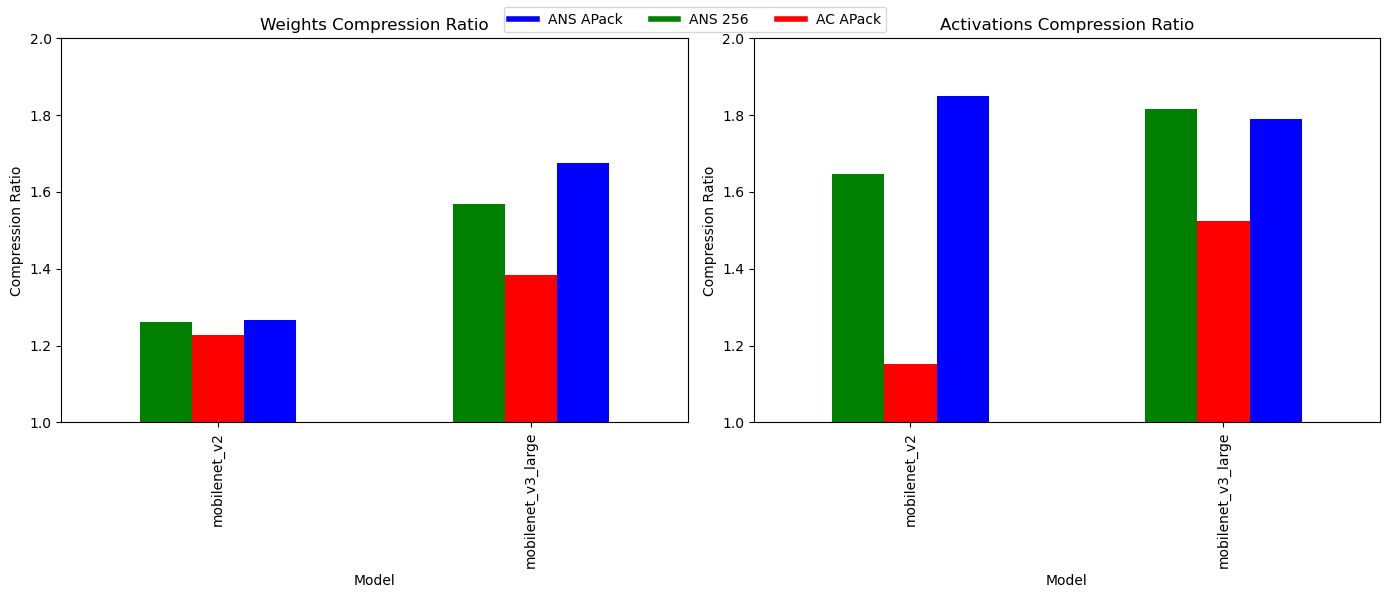

In [38]:
models = ["mobilenet_v2", "mobilenet_v3_large"]
labels = ["ANS APack", "ANS 256", "AC APack"]

# Create DataFrames
df_w = pd.DataFrame({
    "Model": models,
    "w_apack": [w_apack_mean, w_apack_mean_v3],
    "w_256": [w_256_mean, w_256_mean_v3],
    "w_orig": [w_orig_mean, w_orig_mean_v3]
})

df_act = pd.DataFrame({
    "Model": models,
    "act_apack": [act_apack_mean, act_apack_mean_v3],
    "act_256": [act_256_mean, act_256_mean_v3],
    "act_orig": [act_orig_mean, act_orig_mean_v3]
})

# Define the colors for each category
color_map = {
    "orig": "blue",
    "apack": "green",
    "256": "red"
}

# Define the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot weights compression ratio
bars_w = df_w.set_index("Model").plot(kind="bar", ax=axs[0], color=[color_map["apack"], color_map["256"], color_map["orig"]], legend=False)
axs[0].set_title("Weights Compression Ratio")
axs[0].set_ylabel("Compression Ratio")
axs[0].set_ylim([1.0, 2])  # Set y-axis limits to zoom in

# Plot activations compression ratio
bars_act = df_act.set_index("Model").plot(kind="bar", ax=axs[1], color=[color_map["apack"], color_map["256"], color_map["orig"]], legend=False)
axs[1].set_title("Activations Compression Ratio")
axs[1].set_ylabel("Compression Ratio")
axs[1].set_ylim([1.0, 2])  # Set y-axis limits to zoom in

# Add legend
handles = [plt.Line2D([0], [0], color=color_map[key], lw=4) for key in ["orig", "apack", "256"]]
fig.legend(handles, labels, loc="upper center", ncol=3)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
# Compute how much the compression ratio has improved with APack
print("Weights Compression Ratio Improvement v2: ", df_w["w_apack"] / df_w["w_256"])
print("Activations Compression Ratio Improvement v2: ", df_act["act_apack"] / df_act["act_256"])

print("Weights Compression Ratio Improvement v3: ", df_w["w_apack_v3"] / df_w["w_256_v3"])
print("Activations Compression Ratio Improvement v3: ", df_act["act_apack_v3"] / df_act["act_256_v3"])

Weights Compression Ratio Improvement v2:  0    0.989705
dtype: float64
Activations Compression Ratio Improvement v2:  0    1.396617
dtype: float64
Weights Compression Ratio Improvement v3:  0    1.016955
dtype: float64
Activations Compression Ratio Improvement v3:  0    1.200495
dtype: float64


In [13]:
# compute how much worse the compression ratio is with APack compared to orig
print("Weights Compression Ratio Worsening v2: ", df_w["w_apack"] / df_w["w_orig"])
print("Activations Compression Ratio Worsening v2: ", df_act["act_apack"] / df_act["act_orig"])

print("Weights Compression Ratio Worsening v3: ", df_w["w_apack_v3"] / df_w["w_orig_v3"])
print("Activations Compression Ratio Worsening v3: ", df_act["act_apack_v3"] / df_act["act_orig_v3"])

Weights Compression Ratio Worsening v2:  0    0.996574
dtype: float64
Activations Compression Ratio Worsening v2:  0    0.89797
dtype: float64
Weights Compression Ratio Worsening v3:  0    0.936065
dtype: float64
Activations Compression Ratio Worsening v3:  0    1.021796
dtype: float64


<Axes: title={'center': 'Activations Run Time (ms)'}>

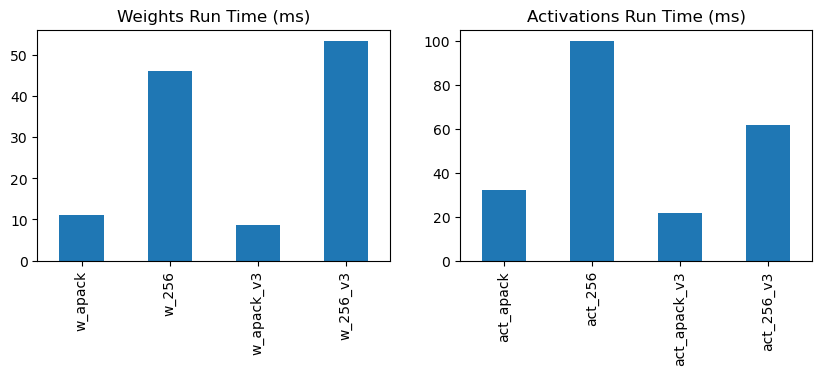

In [ ]:
# plot the time means
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

df_w.loc["Run Time"].plot(kind="bar", ax=axs[0], title="Weights Run Time (ms)")
df_act.loc["Run Time"].plot(kind="bar", ax=axs[1], title="Activations Run Time (ms)")

In [ ]:
!pip install tANS_py

In [ ]:
import tANS_py

In [ ]:
import tANS_py.Coder


s = ["A","B","C"]
f = [2,4,2]
c = tANS_py.Coder.Coder(sum(f), s, f)

In [ ]:
msg = "ABBC"

c.encode_decode(list(msg)), len(msg) * 8

((['A', 'B', 'B', 'C'], 12), 32)